# 印章制作工具

### 导包

In [3]:
from seal import SEAL
from utils import Images

# 初始化印章类
c = SEAL()
# 初始化绘图工具
d = Images()

image_size = (450,250)
txt_wh = (40, 30)
ellipse_ab = (200,100)
ellipse_size = ((ellipse_ab[0])*2+txt_wh[0],(ellipse_ab[1])*2+txt_wh[0])
image_size =(ellipse_size[0]+10,ellipse_size[1]+10)
texts = "模拟的数据有限公司"

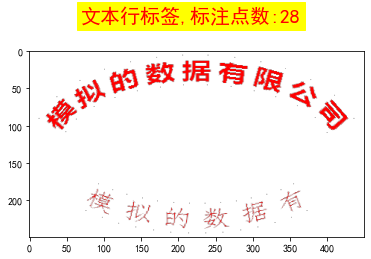

In [4]:
# 创建图片
d.create_image("draw_test.png",image_size)
# d.draw.ellipse([5,5,*ellipse_size],outline = (255,0,0),width=10)
# 生成整行文本以及box坐标
test_every_top_bottom = 0
# 生成单个文字以及对应box坐标
test_nums_top_bottom = 1


if test_nums_top_bottom:
    label_nums =28
    infos,label_infos = c.cal_text_and_label_pos(ellipse_ab,txt_wh,0,texts, label_nums=label_nums, top=True)
    
    for char,x,y,degree in infos:
        d.draw_rotated_char(char, "./fonts/宋体_bold.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    
    for i in label_infos:
        d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))
    
    infos,label_infos = c.cal_text_and_label_pos(ellipse_ab,txt_wh,0,texts[:6], label_nums=label_nums, top=False)
    for char,x,y,degree in infos:
        d.draw_rotated_char(char, "./fonts/simfang.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    for i in label_infos:
        d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))
    d.show_image(f"文本行标签,标注点数:{label_nums}")

if test_every_top_bottom:
    # 计算每个字符的标注框
    infos,label_infos = c.cal_every_text_and_label_pos(ellipse_ab,txt_wh,0,texts, top=True)
    for char,x,y,degree in infos:
        # print(char,x,y,degree)
        d.draw_rotated_char(char, "./fonts/simfang.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    for label_info in label_infos[:3]:
        for i in label_info[:3]:
            # print(label_info[-1])
            d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))

    infos,label_infos = c.cal_every_text_and_label_pos(ellipse_ab,txt_wh,0,texts[:6], top=False)
    for char,x,y,degree in infos:
        print(char,x,y,degree)
        d.draw_rotated_char(char, "./fonts/simfang.ttf", pos=((int(x)+image_size[0]//2), image_size[1]//2-int(y)), font_size=txt_wh, angle=degree, color=(255, 0, 0), spacing=None)
    # p1,p2,p3,p4, char 
    for label_info in label_infos[:3]:
        for i in label_info[:3]:
            print(label_info[-1])
            d.draw_points(i[0]+image_size[0]//2,image_size[1]//2-i[1],color=(255,255,255))
    d.image.save("dfjdskfj.png")
    d.show_image("单字标签")

## 实现透明图片在任意图片任意位置叠加，输出检测结果

label [[0, 0], [450, 0], [450, 250], [0, 250]]


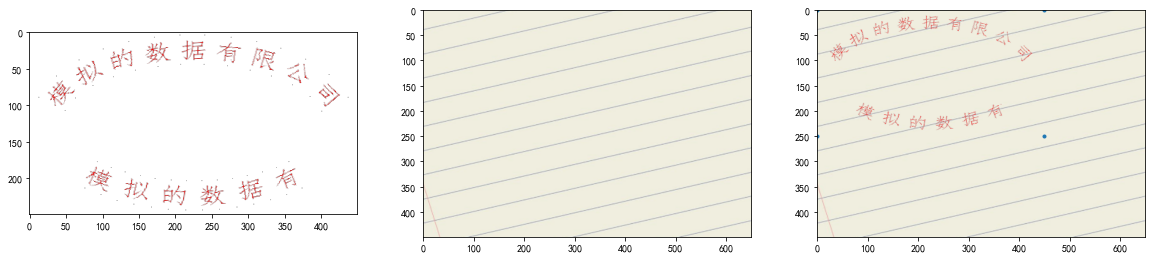

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 20.0)
from PIL import Image
import numpy as np
from imgpro import random_merge_images
fore_image = Image.open("fore/hh.png").convert("RGBA")
fore_image = d.image
back_image = Image.open("back/bg01.png").convert("RGBA").resize((650,450))

final_image,labels = random_merge_images([fore_image],back_image,fore_poss=[[0,0]], fore_factors=1,fore_alphas=1)
##plt 同时显示多幅图像
label = np.array(labels)
# print([:,0])

plt.figure()
plt.subplot(1,3,1)
plt.imshow(fore_image)
plt.subplot(1,3,2)
plt.imshow(back_image)
plt.subplot(1,3,3)
plt.imshow(final_image)
plt.scatter(label[:,:,0],label[:,:,1],marker='.',linewidths=1)
plt.show()